# Tulosten analysointi - harjoitukset
## Tehtäväkokonaisuus 7: Datan esikäsittely ja koneoppiminen - tulosanalyysi

* Tehtävä **7.1**: Datan esikäsittely
* Tehtävä **7.2 - 7.4**: Koneoppiminen
* Tehtävä **7.5**: Tulosten analysointi ja menetelmien vertailu

## Tehtävä 7.0: Opiskelijaryhmän tiedot
* **Kaikkien ryhmään** kuuluvien opiskelijoiden nimet ja JAMK:n opiskelijatunnukset
    * TODO: Opiskelija 1 + opiskelijatunnus
    * TODO: Opiskelija 2 + opiskelijatunnus
    * TODO: Opiskelija 3 + opiskelijatunnus
    * TODO: Opiskelija 4 + opiskelijatunnus

Huom! Vain yksi vastaus tähän ryhmätehtävään per ryhmä. Kaikki vastaukset arvioidaan koko ryhmän jäsenille samalla tavalla.

## Tehtävien pisteytys

* Opintojakson opettaja laskee pisteet palautuksen jälkeen
* Alla kootusti tehtävien maksimipistemäärät

| 7.1 | 7.2 | 7.3 | 7.4 | 7.5 | Yhteensä |
|-----|-----|-----|-----|-----|----------|
| 2p  | 1p  | 1p  | 1p  | 3p  | max. 8p  |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Tehtävä 7.1
## Datan esikäsittely (2 p)    
    
    
Kysymyksiä tehtävään liittyen
* Kuvaile mitä tässä osiossa tapahtuu?
* Miksi dataa yleisesti ottaen esikäsitellään?
* Millainen on DataFrame, jota tehtävän seuraavien vaiheiden koneoppimisen algoritmit käyttävät
* Mitä muuta datalle voisi vielä tarvittaessa tehdä ennen koneoppimisvaihetta?


## Tehtävä 7.1

* TODO: Täydennä tähän vastauksesi datan esikäsittelyyn liittyen
Se mitä tässä osiossa tapahtuu, olen laittanut ko. koodiin kommentit.

Dataa esikäsitellään jotta datasta saadaan jalostettua asianmukaista jatkokäsittelyä varten
täten saadaan totuudenmukaisempi/virheettömämpilopputulos, sillä datassa voi olla virheitä/puutteita,joille tulee tehdä jotakin.
Data esikäsitellään sopivaan muotoon esim. pandas/nympy kirjastofunktiota/-metodeita varten jotta toimivat oikein.
Datan mallinnusta varten data muunnetaan sopivaan muotoon. 

DataFrame, jota tehtävän seuraavien vaiheiden koneoppimisen algoritmit käyttävät on 
vain numerotietoa sisältävä, tehtävän kannalta turhat sarakkeet on poistettu, tyhjät arvot täytetty "keskiluvuilla", 
eheytetty.
Ennen koneoppimisvaihetta datasta voisi filtteröidä joillakin ehdoilla turha asiaankuulumaton pois, mahdollisesti dropata kenttiä. 

In [2]:
df = pd.read_csv('titanic.csv')

df.head()
# luetaan csv-tiedosto dataframeen

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())
# poistetaan dataframesta sarakkeita 

median_age = df["Age"].median()

# lasketaan median ikään liittyen. Mediaani on järjestetyn joukon keskimmäinen alkio
df["Age"] = df["Age"].fillna(median_age)
most_frequent_embarked = df["Embarked"].mode().loc[0]
# 
#The mode() function is used to get the mode(s) of each element along the selected axis. 
# The mode of a set of values is the value that appears most often. It can be multiple values.
df["Embarked"] = df["Embarked"].fillna(most_frequent_embarked)

# korvataan tyhjät solut luvuilla jotka esiintyvät useimmiten

from sklearn.preprocessing import LabelEncoder

# koodataan datasta ei numeeriset arvot numeeriseen muotoon sarakkeet Sex, Embarked
# jolloin male =0 female=1, S=2, C=0
sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))

df["FamilySize"] = df["SibSp"] + df["Parch"]
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 0, "IsAlone"] = 0

y = df["Survived"]
x = df.drop("Survived", axis=1)

# dropataan Survived sarake
x.head()

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.0,1,0,7.2500,2,1,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,2,0,1
3,1,0,35.0,1,0,53.1000,2,1,0
4,3,1,35.0,0,0,8.0500,2,0,1


## Tehtävä 7.2
## Koneoppiminen ensimmäisellä menetelmällä (1 p)

Kysymyksiä pohdittavaksi?

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

## Tehtävä 7.2 - Vastaus

* TODO: Täydennä tähän kirjoittamalla vastaus Koneoppimismenetelmän käyttöön liittyen

Menetelmä:
Supervised learning (ohjattu oppiminen) K-Nearest Neighbors 
K-Nearest Neighbour: The Distance-Based Machine Learning Algorithm

Onnistumisprosentti: 70


Accuracy: 0.7014925373134329
Confusion matrix:
 [[144  21]
 [ 59  44]]


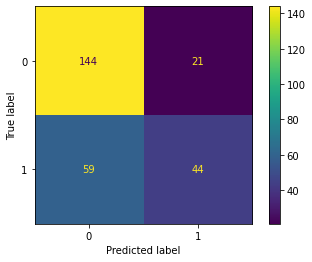

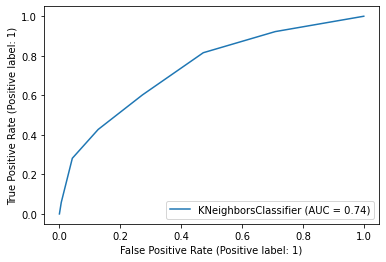

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_curve, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5313, stratify=y)
# asetettiin alkuarvot muuttujille
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  #, pos_label=2)
plot_roc_curve(knn, X_test, y_test)
plt.show()

## Tehtävä 7.3
## Koneoppiminen toisella menetelmällä (1 p)

Kysymyksiä pohdittavaksi

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

## Tehtävä 7.3 - Vastaus

* TODO: Täydennä tähän kirjoittamalla vastaus Koneoppimismenetelmän käyttöön liittyen
Menetelmä:
Unsupervised learning (ohjaamaton oppiminen), K-means klusterointi 
K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning.

Onnistumisprosentti 57.58


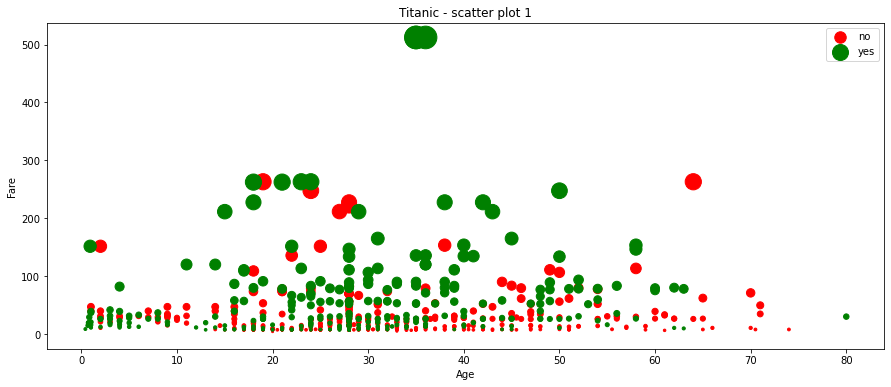

In [6]:
# Tulostetaan datajoukot scatter plot - kuvaajaa käyttäen
plt.figure(2, figsize=(15, 6))

# Ensimmäinen kuvaaja
ax = plt.subplot()
X_out = df[['Survived', 'Age', 'Fare']].copy()
ax.scatter(X_out[X_out['Survived'] == 0]['Age'], X_out[X_out['Survived'] == 0]['Fare'],
           s=X_out[X_out['Survived'] == 0]['Fare'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['Age'], X_out[X_out['Survived'] == 1]['Fare'],
           s=X_out[X_out['Survived'] == 1]['Fare'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 1")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

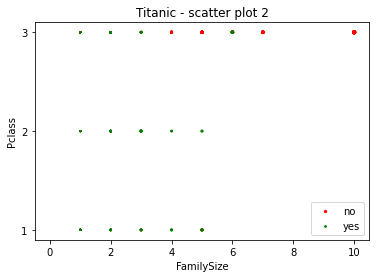

In [7]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
X_out = df[['Survived', 'FamilySize', 'Pclass']].copy()

ax.scatter(X_out[X_out['Survived'] == 0]['FamilySize'], X_out[X_out['Survived'] == 0]['Pclass'],
           s=X_out[X_out['Survived'] == 0]['FamilySize'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['FamilySize'], X_out[X_out['Survived'] == 1]['Pclass'],
           s=X_out[X_out['Survived'] == 1]['FamilySize'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 2")
plt.xlabel("FamilySize")
plt.ylabel("Pclass")
plt.show()

In [8]:
from sklearn.cluster import KMeans

actual_result_df = df['Survived']

km_malli = KMeans(n_clusters=4, max_iter=600, random_state=1523, algorithm='auto')
km_malli.fit(df)

pred = km_malli.predict(df)

res_df = pd.DataFrame({'actual': actual_result_df, 'predicted': pred})

print(res_df.head())
correct_predictions = res_df[res_df['actual'] == res_df['predicted']].count()
print(f"Prediction: {round((correct_predictions['actual'] / len(res_df)) * 100, 2)} %")

   actual  predicted
0       0          0
1       1          3
2       1          0
3       1          3
4       0          0
Prediction: 57.58 %


## Tehtävä 7.4
## Koneoppiminen kolmannella menetelmällä (1 p)

Kysymyksiä pohdittavaksi

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

## Tehtävä 7.4 - Vastaus

* TODO: Täydennä tähän kirjoittamalla vastaus Koneoppimismenetelmän käyttöön liittyen
Menetelmä:
Supervised learning (ohjattu oppiminen)
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique 

Onnistumisprosentti 84


In [9]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5324)

model = RandomForestClassifier(max_depth=6, random_state=2, max_features=3)

model.fit(X_train, y_train)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

Test accuracy: 0.84
[[150  14]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       164
           1       0.84      0.73      0.78       104

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

feature:       Pclass - relative importance: 10.6 %
feature:          Sex - relative importance: 39.4 %
feature:          Age - relative importance: 14.0 %
feature:        SibSp - relative importance:  3.1 %
feature:        Parch - relative importance:  2.5 %
feature:         Fare - relative importance: 20.3 %
feature:     Embarked - relative importance:  2.5 %
feature:   FamilySize - relative importance:  6.0 %
feature:      IsAlone - relative importance:  1.5 %


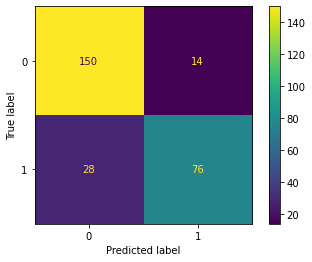

In [10]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Tehtävä 7.5
## Koneoppimismenetelmien vertailu (3 p)

Kysymyksiä pohdittavaksi

* Vertaile kolmea tässä dokumentissa käytettyä koneoppimismenetelmää toisiinsa?
* Miten koneoppiminen näillä eri menetelmillä mielestäsi onnistui?
* Minkä menetelmän valitsisit jatkokäyttöön, jos lähdedata pysyy samana?
* Voiko jonkin koneoppimismenetelmän pudottaa tämän testin perusteella pois?
* Mikä muu kuin valittu koneoppimismenetelmä voi vaikuttaa tuloksiin?
* Muita huomioita?

## Tehtävä 7.5 - Vastaus

* TODO: Täydennä tähän kirjoittamalla vastaus erilaisten Koneoppimismenetelmän vertailuihin liittyen
Supervised learning (ohjattu oppiminen) Random forester
Unsupervised learning (ohjaamaton oppiminen), K-Means clustering
Supervised learning (ohjattu oppiminen) K-Nearest Neighbors

Koneoppiminen näillä eri menetelmillä mielestäni onnistui tyydyttävän hyvin.
Näistä valitsisin jatkokäyttöön kolmannen menetelmän, koska sillä saatiin paras tulos, lisäksi käyttäjän osuus koodista pienin, jolloin käyttöönotto ja käyttö yksinkertaisempaa ja vähemmän virheherkkää
Jos joku menetelmä pitäisi udottaa pois niin pudottaisin menetelmän 2, sillä se on näkyvältä koodiltaan pisin ja hankalin (lisää virheherkkyyttä), ja tulos huonoin.
Tuloksiin koneoppimismenetelmän lisäksi vaikuttaa tietysti lähde-/syötedata ja/tai datan valmistelu/esikäsittely, 
toistojen määrä. Lähde datan ja sen laatu lienee se tärkein, joka ratkaisee menetelmän onnistumisen tai epäonnistumisen. Iteroinnilla voidaan parantaa, mutta jos lähdedata on huonoa tai j´huonoisti esikäsitelty niin toistot saattavat vain huonontaa matkalla päämäärään.

## Ylimääräisiä esimerkkejä koneoppimisesta

Seuraavassa on muutama lisäesimerkki, joka voi herättää lisää ajatuksia koneoppimisalgoritmien soveltamisesta.

* Lähdeaineisto on edelleen Titanic
* Esikäsittely on hieman poikkeava tehtävistä
* Mukana on myös uusi koneoppimismenetelmä

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


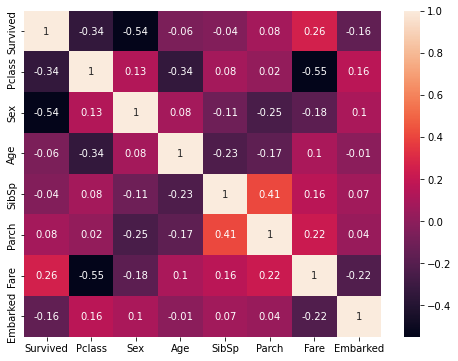

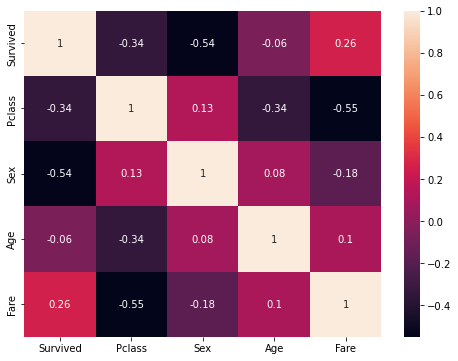

{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2, nan: 3}


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
df = pd.read_csv('titanic.csv')

df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)

from sklearn.preprocessing import LabelEncoder

sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

df.drop(["Parch", "SibSp", "Embarked"], axis=1, inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))
y = df["Survived"]
x = df.drop("Survived", axis=1)
x.head()

Test accuracy: 0.80
[[101   9]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       110
           1       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179

feature:       Pclass - relative importance: 18.0 %
feature:          Sex - relative importance: 43.2 %
feature:          Age - relative importance: 18.1 %
feature:         Fare - relative importance: 20.7 %


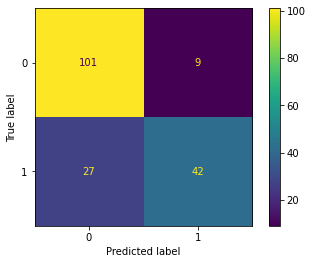

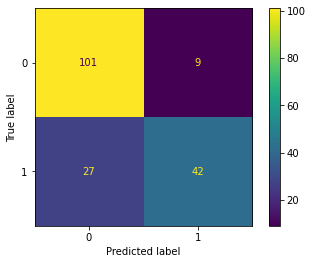

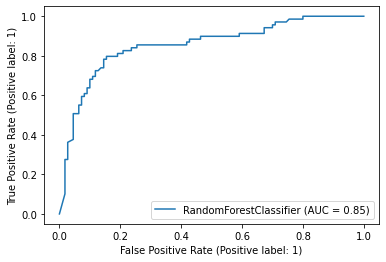

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54123, stratify=y)

model = RandomForestClassifier(max_depth=6, random_state=2, max_features=4)

model.fit(X_train, y_train)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

plot_confusion_matrix(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(model, X_test, y_test)
plt.show()

     Pclass  Sex   Age     Fare
430       1    1  28.0  26.5500
6         1    1  54.0  51.8625
745       1    1  70.0  71.0000
Accuracy: 0.6828358208955224
Confusion matrix:
 [[140  25]
 [ 60  43]]


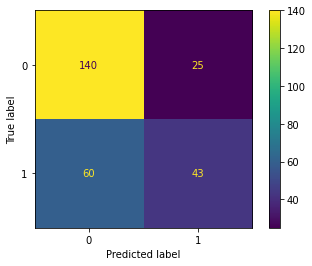

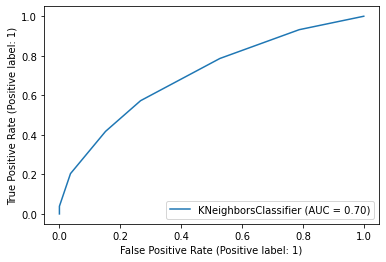

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5313, stratify=y)
print(X_train[:3])
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [14]:
actual_result_df = df['Survived']
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0], dtype=int64)

Accuracy: 0.753731343283582
Confusion matrix:
 [[131  34]
 [ 32  71]]


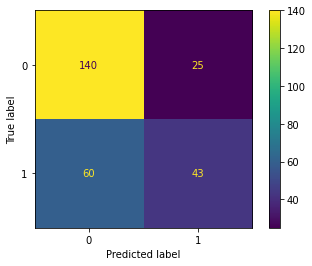

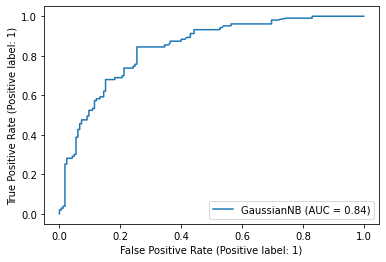

In [16]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(gnb, X_test, y_test)
plt.show()